In [2]:
#importing important libraries
import pandas as pd
import numpy as np
from pyramid import auto_arima

In [6]:
#loading and conveting time series data by setting index as time
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.index = df.Month
df = df.drop('Month', axis =1)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


[]

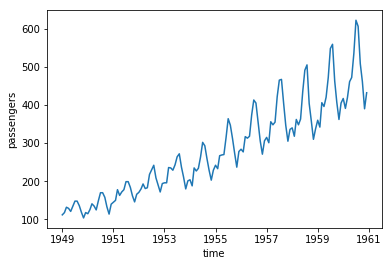

In [9]:
#visualizing timeseries data
import matplotlib.pyplot as plt
plt.plot(df)
plt.xlabel('time')
plt.ylabel('passengers')
plt.plot()

In [12]:
#divide into train and validation set
train = df[:int(0.8*(len(df)))]
test = df[int(0.8*(len(df))):]
print(train.shape)
print(test.shape)

(115, 1)
(29, 1)


In [15]:
#training model
model = auto_arima(train, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
#fitting model
model.fit(train)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1076.519, BIC=1081.991, Fit time=0.012 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1064.624, BIC=1072.833, Fit time=0.075 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1061.078, BIC=1072.023, Fit time=0.067 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1053.366, BIC=1067.047, Fit time=0.231 seconds
Fit ARIMA: order=(0, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=1038.249, BIC=1057.402, Fit time=0.321 seconds
Fit ARIMA: order=(0, 1, 6) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 7) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 8) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 9) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=na

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(8, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [19]:
#predicting values and evaluating model
y_pred = model.predict(n_periods=len(valid))
from sklearn.metrics import r2_score
acc = r2_score(valid.values, y_pred)
print(acc)

0.7774381255681063
